Stakeholder:
| Erin Robinson       | Buyer       | Invest in poor neighborhood, buying & selling, costs back + little profit, socially responsible   

In [3]:
# Import packages
import warnings

warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Import Data set
df = pd.read_csv('data/King_County_House_prices_dataset.csv')

## Research questions and Hypothesis
| Research question     | Hypothesis |
| ----------- | ----------- |
| 1. Are there neighborhoods that are unpopular/poor?   | a. Group by ZIPcode to find poorest ZIPregion or plot on map to visually inspect the spatial distribution?   |
|                                                       | b. The lower the sqft_livingsquare per number of bedrooms, the lower the price and grade|
|                                                       | c. The lower the ratio between sqft_livingsqare/sqft_lot the lower the price and grade |
|                                                       | Number of floors  |
| 2. Is the quality of houses mixed even in e.g. unpopular neighborhoods?   | a. The unpopularer/poorer a ZIPcode, the lower the mode of grades   |
|                                                                           | b. The unpopularer/poorer a ZIPcode, the lower and the standard variation of grades or the spread of grades |
|                                                                           | c. The poorer a house, the lower the  |
| 3. Does the date of renovation and the year of built affect the price?    | The later the renovation date, the higher the price per sqft_livingsquare   |
| For houses in unpopular neighborhoods, is the price lower than comparable houses in a standard neighborhood  | ?   |
| How is the general situation with neighborhoods, is there a strong separation between economical classes?  | ?   |
| Are there unpopular neighborhoods that have potential for families/students ? | Cheap price per sqft but medium grade   |



In [5]:
# drop out uninteresting columns
df_new = df.drop(['date','floors','waterfront','view','sqft_basement','sqft_above'],axis=1)
#df['zipcode'] = pd.Categorical(df.zipcode)
#df['zipcode'] = df.zipcode.astype(str)
#df_new.head()
#df['zipcode'].dtype


In [6]:
# Correlation between Price and Ratio sqft_living/n_bedrooms, create new columns
df_new['sqft_per_room'] = df_new['sqft_living'] / df_new['bedrooms']
df_new['price_per_sqft'] = df_new['price'] / df_new['sqft_living']
df_new.head()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,condition,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_per_room,price_per_sqft
0,7129300520,221900.000,3,1.000,1180,5650,3,7,1955,0.000,98178,47.511,-122.257,1340,5650,393.333,188.051
1,6414100192,538000.000,3,2.250,2570,7242,3,7,1951,1991.000,98125,47.721,-122.319,1690,7639,856.667,209.339
2,5631500400,180000.000,2,1.000,770,10000,3,6,1933,NaN,98028,47.738,-122.233,2720,8062,385.000,233.766
3,2487200875,604000.000,4,3.000,1960,5000,5,7,1965,0.000,98136,47.521,-122.393,1360,5000,490.000,308.163
4,1954400510,510000.000,3,2.000,1680,8080,3,8,1987,0.000,98074,47.617,-122.045,1800,7503,560.000,303.571


In [7]:
#group by zip code, sort mean grade
df_zip = df_new.groupby('zipcode').mean('grade').reset_index().sort_values('grade').reset_index(drop=True)
df_zip.head()

,zipcode,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,condition,grade,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,sqft_per_room,price_per_sqft
0,98168,3204784607.100,240328.372,2.996,1.433,1468.625,11269.844,3.245,6.509,1952.721,53.475,47.490,-122.308,1471.680,9744.022,502.556,175.373
1,98002,4850894131.724,234284.035,3.327,1.839,1627.744,7517.633,3.744,6.693,1967.774,60.212,47.309,-122.213,1479.030,7585.482,496.293,151.174
2,98178,4291467000.687,310612.756,3.305,1.732,1729.351,8309.122,3.321,6.817,1955.233,85.322,47.499,-122.247,1648.817,8149.641,530.544,189.173
3,98146,4607854849.753,359496.260,3.125,1.634,1621.451,9020.243,3.292,6.823,1955.792,166.752,47.502,-122.358,1535.375,8263.705,531.145,225.497
4,98106,4412164468.734,319581.394,3.101,1.804,1487.884,5554.239,3.248,6.866,1965.537,98.159,47.536,-122.357,1361.230,5120.137,490.636,231.327


In [36]:
# Statistical information about the mean grades per Zipcode
df_zip['grade'].describe()

count   70.000
mean     7.667
std      0.611
min      6.509
25%      7.282
50%      7.553
75%      8.017
max      9.560
Name: grade, dtype: float64

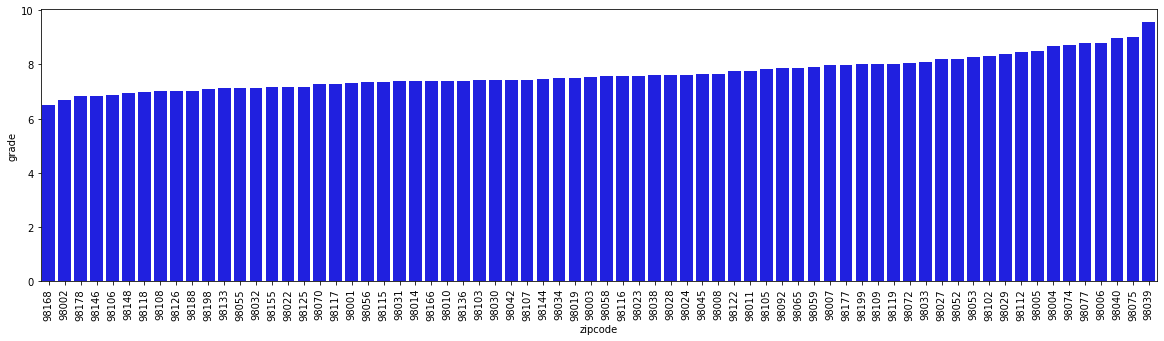

In [9]:
#create a plot with the mean grade ranking grouped by zipcode
plt.figure(figsize=(20,5))
ax = sns.barplot(x=df_zip['zipcode'],y=df_zip['grade'],color='blue',order=df_zip.sort_values('grade').zipcode)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90);

In [10]:
# reduce the number of interesting houses by dropping every zipcode with a mean grade higher the median of mean grades per zipcode -> take only the 50% less popular zipcodes into account
df_zip_new = df_zip.query("grade <= 7.553")
#create a list with the resulting zipcodes
zip_new = list(df_zip_new['zipcode'])
#check, if length of the list is now approx. half the length compared to the complete data set (70 zipcodes)
len(zip_new)


35

In [11]:
#create a new dataframe only containing houses with zipcodes in the zip_new list
df_result = df_new[df_new['zipcode'].isin(zip_new)]
#df_result.groupby('zipcode').mean('grade').reset_index()

<AxesSubplot:xlabel='sqft_per_room', ylabel='price'>

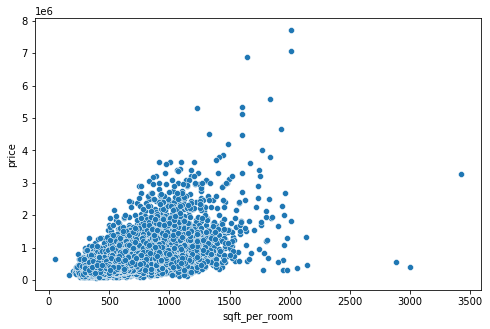

In [28]:
#Plot: Correlation between price and sqft_per_room, big rooms tend to higher prices, correlation not strong
sns.scatterplot(x=df_new['sqft_per_room'],y=df_new['price'])

<AxesSubplot:xlabel='grade', ylabel='price'>

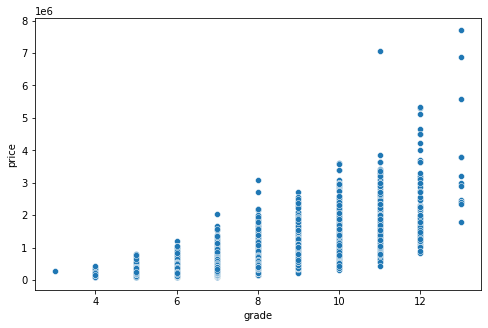

In [29]:
#Plot: Correlation between price and grade
sns.scatterplot(x=df['grade'],y=df['price'])

<AxesSubplot:xlabel='condition', ylabel='price'>

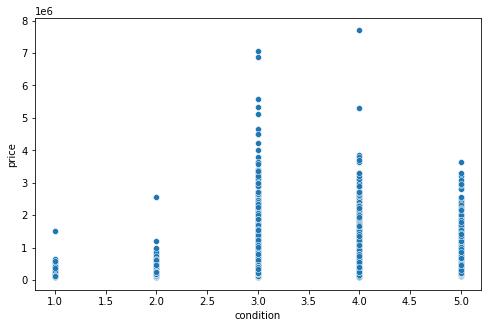

In [30]:
#Plot: Correlation between price and condition
sns.scatterplot(x=df['condition'],y=df['price'])

<AxesSubplot:xlabel='grade', ylabel='price_per_sqft'>

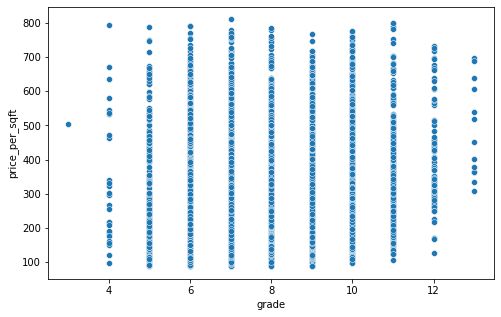

In [55]:
#Plot: Correlation between price_per_sqft and grade
sns.scatterplot(x=df_new['grade'],y=df_new['price_per_sqft'])

<AxesSubplot:xlabel='condition', ylabel='price_per_sqft'>

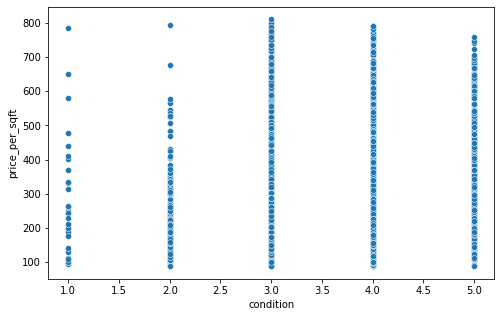

In [ ]:
#Plot: Correlation between price_per_sqft and condition
sns.scatterplot(x=df['condition'],y=df['price_per_sqft'])

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

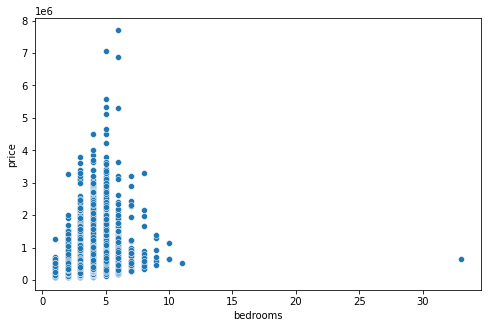

In [ ]:

sns.scatterplot(x=df['bedrooms'],y=df['price'])

<AxesSubplot:xlabel='bathrooms', ylabel='price_per_sqft'>

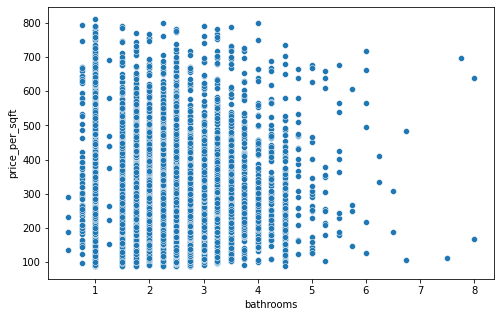

In [ ]:
sns.scatterplot(x=df['bathrooms'],y=df['price_per_sqft'])

<AxesSubplot:xlabel='sqft_living', ylabel='sqft_living15'>

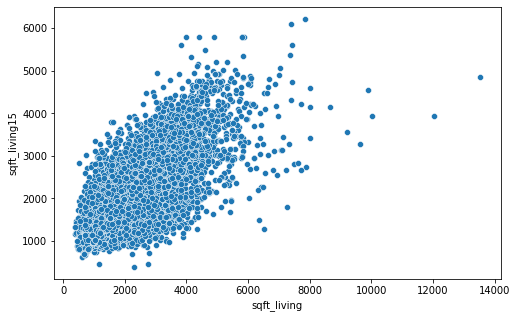

In [ ]:
sns.scatterplot(x=df['sqft_living'],y=df['sqft_living15'])

<AxesSubplot:xlabel='price_per_sqft', ylabel='Count'>

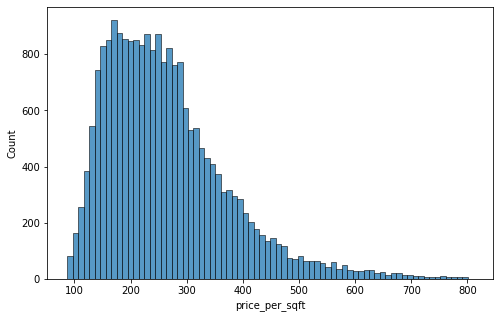

In [ ]:
sns.histplot(df['price_per_sqft'])

In [ ]:
df['price_per_sqft'].describe()

count   21597.000
mean      264.143
std       110.000
min        87.588
25%       182.292
50%       244.645
75%       318.333
max       810.139
Name: price_per_sqft, dtype: float64

<AxesSubplot:xlabel='sqft_per_room', ylabel='Count'>

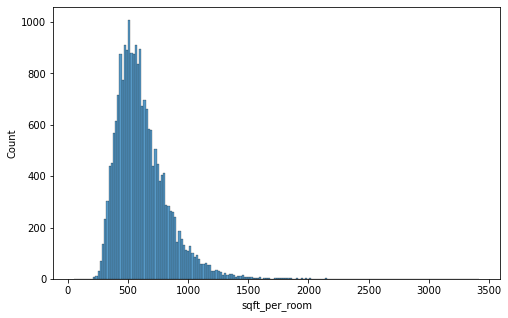

In [ ]:
sns.histplot(df['sqft_per_room'])

In [ ]:
df['sqft_per_room'].describe()

count   21597.000
mean      618.148
std       215.899
min        49.091
25%       470.000
50%       576.667
75%       722.500
max      3420.000
Name: sqft_per_room, dtype: float64

In [58]:
df_result = df_result.query("price_per_sqft < 182 and sqft_per_room < 470 and condition <= 2").reset_index(drop=True)
df_result

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,condition,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_per_room,price_per_sqft
0,4337000160,110000.000,2,1.000,830,7590,2,6,1943,0.000,98166,47.478,-122.335,980,7590,415.000,132.530
1,1623049041,82500.000,2,1.000,520,22334,2,5,1951,0.000,98168,47.480,-122.296,1572,10570,260.000,158.654
2,3812400657,160000.000,3,1.000,1200,8360,2,6,1948,0.000,98118,47.541,-122.281,1570,6823,400.000,133.333
3,3422059085,157340.000,2,1.000,900,23000,2,7,1953,0.000,98042,47.358,-122.156,1460,8265,450.000,174.822
4,5152600090,235500.000,5,2.500,2340,13713,2,8,1967,NaN,98003,47.331,-122.324,2080,11000,468.000,100.641
5,87000245,170000.000,3,0.750,1040,42180,2,6,1947,0.000,98055,47.452,-122.199,1270,24090,346.667,163.462
6,1900000195,100000.000,2,1.000,930,7623,2,6,1942,NaN,98166,47.467,-122.349,1300,7641,465.000,107.527
7,3821200050,119500.000,3,1.000,1170,11000,2,6,1980,0.000,98019,47.735,-121.983,1590,10894,390.000,102.137
8,3438502668,194000.000,3,1.750,1260,10488,2,7,1952,NaN,98106,47.542,-122.357,1540,9120,420.000,153.968
9,5706600170,204900.000,3,2.000,1390,8245,2,7,1984,NaN,98001,47.267,-122.254,1260,8245,463.333,147.410


In [56]:
#Plot map with original data set
fig = px.scatter_mapbox(df, lat="lat", lon="long", hover_name="id", hover_data=["price","grade"],
                        color_discrete_sequence=["blue"], zoom=8, height=600)
fig.update_layout(mapbox_style="open-street-map",)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [59]:
#Plot map with houses resulting from the restrictions in the interest of the stakeholder
fig = px.scatter_mapbox(df_result, lat="lat", lon="long", hover_name="id", hover_data=["price_per_sqft", "price"],
                        color_discrete_sequence=["blue"], zoom=8, height=600)
fig.update_layout(mapbox_style="open-street-map",)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()